In [1]:
import numpy as np
TestPerf = np.load("GeoShapes_Curriculum_FullUniform_TestPerf_Conv.npy")
ValError = np.load("GeoShapes_Curriculum_FullUniform_ValAcc_Conv.npy")

In [2]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

2


In [3]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [4]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [5]:
TestPerf_Mean

array([[0.15522707, 0.95999998],
       [0.17705008, 0.9549    ],
       [1.09969532, 0.32700001],
       [1.09969532, 0.32700001],
       [0.1641399 , 0.95739999]])

In [6]:
TestPerf_Mean + TestPerf_StE

array([[0.16149525, 0.96028283],
       [0.18665351, 0.95808198],
       [1.10048541, 0.32770712],
       [1.10048541, 0.32770712],
       [0.16593533, 0.95768282]])

In [7]:
TestPerf_Mean - TestPerf_StE

array([[0.14895889, 0.95971713],
       [0.16744666, 0.95171801],
       [1.09890524, 0.3262929 ],
       [1.09890524, 0.3262929 ],
       [0.16234447, 0.95711717]])

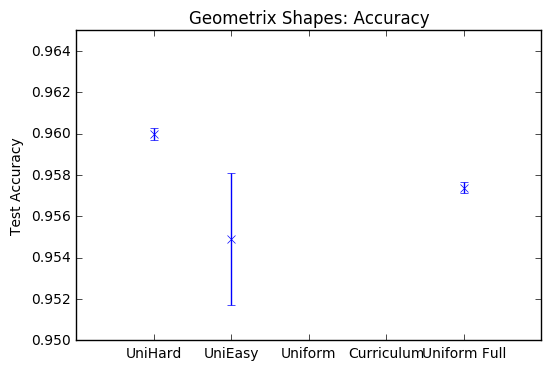

In [10]:
import matplotlib.pyplot as plt

flag = 1

labels = ['Hard','Easy','Uni','Curriculum']
plt.errorbar(np.array([1,2,3,4,5],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,6)
thisplot.set_ylim(0.95,0.965)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

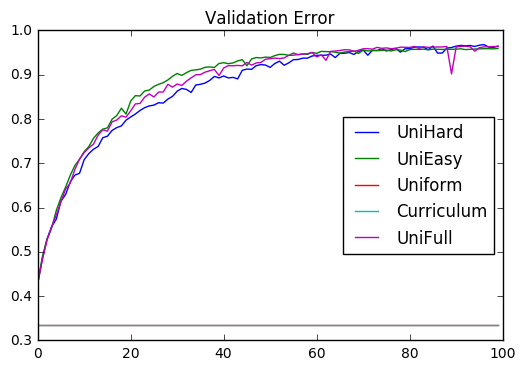

In [14]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform','Curriculum','UniFull'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

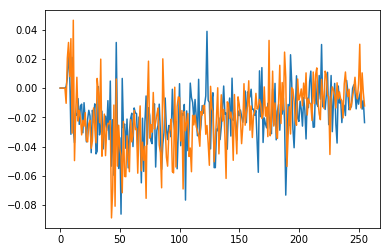

In [13]:
Diff = ValError[:,1] - ValError[:,-1]
plt.plot(Diff)
plt.show()

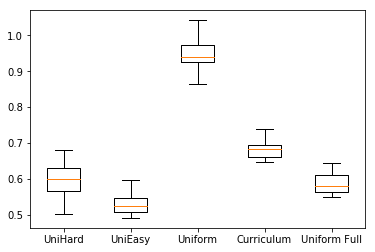

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,0,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()